# Airbnb in Seattle

The goal of this notebook is to analyze Airbnb data in Seattle. The analysis will be centered around 4 questions:
1. What influences the price of Airbnb listings?
2. Which amenities contributes the most to increase a listing rating?
3. When is the busiest period in Seattle, based on houses availability? Are the prices following the trend?

## 1. Import packages and data
Let's first import the python packages and data into the notebook.

In [45]:
# Import packages
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import display
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = None

# Import data
listings = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv')

## 2. Preview listings data
Let's see how the listings data looks like.

In [46]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [47]:
listings.shape

(3818, 92)

## 3. Clean the data
Let's now clean the dataset to get it ready for analysis.

### 3.1. Let's first check how many columns have missing values

In [114]:
# Get the list of columns with missing values and their proportion of missing values

def missing_values(data):
    
    '''
    INPUT
    data - pandas dataframe 
    
    OUTPUT
    missing_val_df - A dataframe holding the fields with missing values and the proportion of them
    '''

    missing_values = pd.DataFrame((len(data)-data.count())/len(data)*100).reset_index()
    missing_values.columns = ['field', 'percentage_nulls']
    missing_val_df = missing_values[missing_values['percentage_nulls']>0].sort_values('percentage_nulls',ascending=False)
    
    return missing_val_df

missing_values(listings)

,field,percentage_nulls
84,license,100.000000
56,square_feet,97.459403
59,monthly_price,60.267156
60,security_deposit,51.126244
58,weekly_price,47.380828
10,notes,42.063908
9,neighborhood_overview,27.029859
61,cleaning_fee,26.977475
11,transit,24.463070
21,host_about,22.498690


### 3.2. Basic data cleaning
We will first do basic cleaning operations such as: removing data will all missing values, removing columns with only one value, set the fields to the right data type, create dummy variables for categorical variables, removing columns with no value for analysis,...

In [49]:
# Get the inputs to clean the data

columns_no_value = ['id','listing_url','thumbnail_url','medium_url','picture_url'
                    ,'xl_picture_url','host_id','host_url','host_thumbnail_url'
                    ,'host_picture_url','latitude','longitude','host_name'
                    ,'neighbourhood','state','street', 'city','zipcode', 'smart_location'
                    ,'calendar_updated', 'first_review', 'last_review', 'neighbourhood_cleansed'
                    ,'host_verifications', 'monthly_price', 'weekly_price']

price_columns = ['price','security_deposit','cleaning_fee','extra_people']

percentages_columns = ['host_response_rate','host_acceptance_rate']

text_columns = ['name','summary','space','description','neighborhood_overview','notes','transit'
                ,'host_about','host_location','host_neighbourhood']

dummies_columns = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type'
                   ,'bed_type','cancellation_policy']

In [50]:
# Create a function that will clean the data

def clean_listings_data(data, missing_threshold, columns_no_value, price_columns, percentages_columns
                        , remove_text_columns, text_columns, dummies_columns):
    
    '''
    INPUT
    data - pandas dataframe 
    missing_threshold - proportion of missing values a column must have to be dropped
    columns_no_value - columns we want to drop from the pandas dataframe
    price_columns - columns containing prices with a dollar sign
    percentages_columns - columns containing percentages with a % sign
    remove_text_columns - whether columns containing text should be removed or not (True/False)
    text_columns - columns containing text
    dummies_columns - categorical columns that need to be converted into dummies
    
    OUTPUT
    data - a cleaned dataframe
    
    This function cleans the listings data using the following steps:
    1. Drop all the columns that contain only missing values
    2. Remove columns which have more than missing_threshold% of missing values
    3. Remove the columns that contain only 1 value
    4. Remove the columns specified in columns_no_value that we do not want to keep in the dataframe
    5. Remove columns containing text if specified to do so in remove_text_columns
    6. Remove dollar sign from price-related columns
    7. Remove % sign from percentage-related columns
    8. Change values in columns containing t/f into 1/0
    9. Create dummy variables for the categorical columns specified in dummies_columns
    '''
    
    # Remove columns with missing values only
    data = data.dropna(axis=1, how='all')
    
    # Remove columns with missing_threshold% missing values
    # The other columns with missing values will be handeled later, depending on which question we want to answer
    missing_values_only = list(data.columns[data.isnull().mean() >= missing_threshold])
    data = data.drop(list(missing_values_only),axis=1)
    
    # Remove columns with the same value
    nunique = data.apply(pd.Series.nunique)
    cols_same_value = nunique[nunique == 1].index
    data = data.drop(list(cols_same_value),axis=1)
    
    # Remove columns with no value for the analysis
    data = data.drop(columns_no_value, axis=1)
    
    # Remove text columns if needed
    if remove_text_columns == True:
        data = data.drop(text_columns, axis=1)
    
    # Remove $ and commas from price-related fields
    for col in price_columns:
        data[col] = data[col].str.slice(start=1).astype(str).str.replace(",","").astype(float)
        
    # Remove % sign from percentage-related fields
    for col in percentages_columns:
        data[col] = data[col].str.strip('%').astype(float)/100
        
    # Change t/f columns to boolean types
    for col in data.columns:
        if list(data[col].dropna().unique()) == ['f', 't'] or list(data[col].dropna().unique()) == ['t', 'f']:
            data[col] = data[col].replace('t',1).replace('f',0)
            
    # Create dummy variables for categorical variables suited for dummy
    # We are keeping the categorical columns on purpose for further data exploration
    for col in dummies_columns:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col 
                 , prefix_sep='_', drop_first=False, dummy_na = False)], axis=1)
    
    return data

In [51]:
# Get a cleaned dataset
listings_clean = clean_listings_data(listings, 0.9, columns_no_value, price_columns, percentages_columns
                                     , True, text_columns, dummies_columns)

### 3.3. Create new fields
Let's create new fields based on the existing ones that will be better suited for analysis.

In [52]:
# Convert the 'host_since' columns into days since host 

def host_since_into_days(data, column_in, column_out):
    
    '''
    INPUT
    data - pandas dataframe 
    column_in - column to convert
    column_out - name of the column to create
    
    OUTPUT
    data - the dataframe with the new column added
    
    This function converts the column 'host_since' which contains a date into 'days_since_host' which contains the 
    number of days since host. This is done so that this column can be handeled in models.
    '''
    
    # Calculate the number of days since host
    today = date.today()
    days_since_host = today - pd.to_datetime(data[column_in])

    # Convert into days
    days_host = []
    for row in days_since_host:
        row = row.days
        days_host.append(row)

    # Create days since host column 
    data[column_out] = pd.Series(days_host)

    # Drop host since column
    data = data.drop(column_in,axis=1)
    
    return data
    
listings_clean = host_since_into_days(listings_clean, 'host_since', 'days_since_host')

In [53]:
# Create a column for each amenity

def column_each_amenity(data, amenity_column):
    
    '''
    INPUT
    data - pandas dataframe 
    amenity_column - column that contains the list of amenities
    
    OUTPUT
    data - the dataframe with columns added for each amenity
    amenity_df - a dataframe that contains one column per amenity
    
    This function adds to the dataframe one column per amenity, that specifies if the listing has the
    amenity of not. It includes the following steps:
    1. Convert the field that contains the amenities into a list for future manipulation
    2. Create a new dataframe that contains one column per amenity
    3. Remove the columns that are not needed in the new dataframe: the initial amenity column, and the 
       column 'washer/dryer' because the information is already included in other columns
    4. Drop the amenity column from the initial dataframe
    5. Concatenate initial dataframe with the newly created dataframe containing the amenity columns
    '''

    # Convert amenity field values into lists
    cleaned_amenities = data[amenity_column].str.strip('{').str.strip('}').str.replace('"',"").str.lower()

    for item in range(0,len(cleaned_amenities)):
        cleaned_amenities[item] = cleaned_amenities[item].split(",")
    
    # Create a new dataframe with one column per amenity
    amenity_df = cleaned_amenities.apply(frozenset).to_frame(name='amenity')

    for amenity in frozenset.union(*amenity_df.amenity):
        amenity_df[amenity] = amenity_df.apply(lambda _: int(amenity in _.amenity), axis=1)

    # Drop not useful columns
    # amenity = list with all the amenities
    # washer / dryer = there are no instances where this value is 1 and washer = 0 or dryer = 0
    amenity_df = amenity_df.drop(['amenity','washer / dryer'],axis=1)

    # Drop amenity column from initial dataset
    data = data.drop(amenity_column,axis=1)

    # Concatenate dataframes
    data = pd.concat([data, amenity_df], axis=1)
    
    return data, amenity_df

listings_clean, amenity_df = column_each_amenity(listings_clean, 'amenities')

In [54]:
listings_clean.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,days_since_host,,heating,washer,pool,doorman,24-hour check-in,lock on bedroom door,fire extinguisher,carbon monoxide detector,family/kid friendly,first aid kit,kitchen,free parking on premises,air conditioning,buzzer/wireless intercom,wheelchair accessible,pets allowed,dryer,hot tub,dog(s),breakfast,other pet(s),pets live on this property,wireless internet,cable tv,tv,smoke detector,hair dryer,shampoo,laptop friendly workspace,elevator in building,safety card,essentials,iron,indoor fireplace,suitable for events,internet,hangers,gym,smoking allowed,cat(s)
0,within a few hours,0.96,1.0,0.0,3.0,3.0,1.0,1.0,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,NaN,NaN,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,2,4.07,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2898.0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,within an hour,0.98,1.0,1.0,6.0,6.0,1.0,1.0,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,6,1.48,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2338.0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,within a few hours,0.67,1.0,0.0,2.0,2.0,1.0,1.0,Queen Anne,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,2,1.15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1862.0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
3,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,Queen Anne,1,Apart

## 4. Find insights
We will now take every question and analyze the data related to them. We will also model the data to find insights within the data.

###  4.1. Distribution of listings
Let's first have a look at the data in general and how the listings are spread.

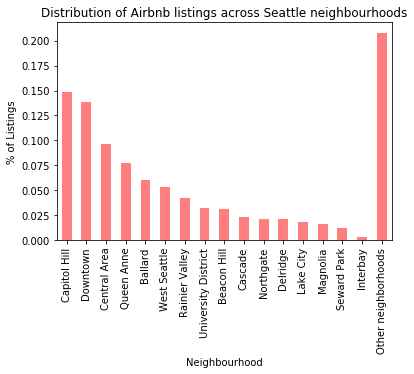

In [175]:
# How are the listings spread accross neighbourhoods groups?

def plot_distribution(data, variable, title, xlabel, ylabel):
    
    '''
    INPUT
    data - pandas dataframe 
    variable - variable to split on
    tite - the graph title
    xlabel - the graph x axis label
    ylabel - the graph y axis label
    
    OUTPUT
    graph
    
    This function generates a bar chart that shows the distribution of listings according to the variable specified
    '''
    # Get proportions
    groups = data[variable].value_counts()
    groups_perc = (groups/data.shape[0])
    
    # If neighbourhoods, set the 'other neighbourhoods' bar on the right
    if variable == 'neighbourhood_group_cleansed':
        groups_perc = pd.concat([groups_perc.drop('Other neighborhoods', axis = 0), groups_perc[['Other neighborhoods']]])
    
    # Create graph
    groups_perc.plot(kind="bar",color=(1, 0, 0, 0.5));
    plt.title(title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot_distribution(listings_clean, 'neighbourhood_group_cleansed',"Distribution of Airbnb listings across Seattle neighbourhoods"
                 ,'Neighbourhood', '% of Listings')

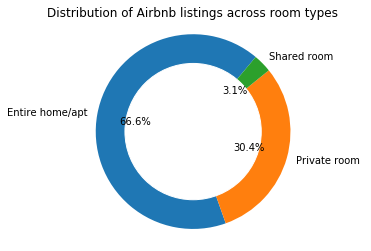

In [153]:
# How are the listings spread across room types?

def plot_donutchart(data, variable, title):
    
    '''
    INPUT
    data - pandas dataframe 
    variable - variable to split on
    tite - the graph title
    
    OUTPUT
    graph
    
    This function generates a pie chart graph that shows the distribution of listings according 
    to the variable specified
    '''
    # Get proportions
    groups = data[variable].value_counts()
    groups_perc = (groups/data.shape[0])
    
    # Create graph
    fig1, ax1 = plt.subplots()
    ax1.pie(list(groups_perc.values), labels=list(groups_perc.index), autopct='%1.1f%%',
        shadow=False, startangle=50)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    
    # Add circle to the center to transform it into a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    
    plt.show()
    
plot_donutchart(listings_clean, 'room_type',"Distribution of Airbnb listings across room types")

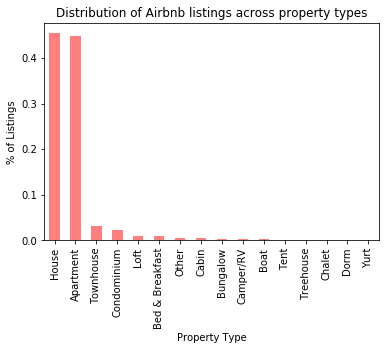

In [176]:
# How are the listings spread across property types?

plot_distribution(listings_clean, 'property_type',"Distribution of Airbnb listings across property types"
                 ,'Property Type', '% of Listings')

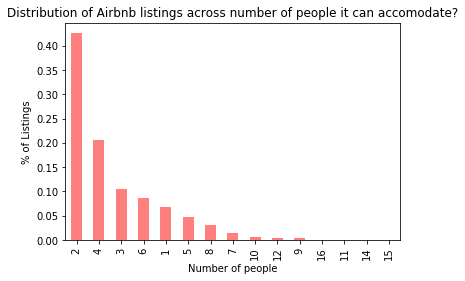

In [58]:
# How are the listings spread across number of people they can accomodate?

plot_distribution(listings_clean, 'accommodates', "Distribution of Airbnb listings across number of people it can accomodate?"
                 ,'Number of people', '% of Listings')

### 4.2. Question 1: What influences the price of Airbnb listings?
Let's now analyze and model what factors influence the price of the Airbnb listings in Seattle.

**Let's first vizualize the average price according to different dimensions.**

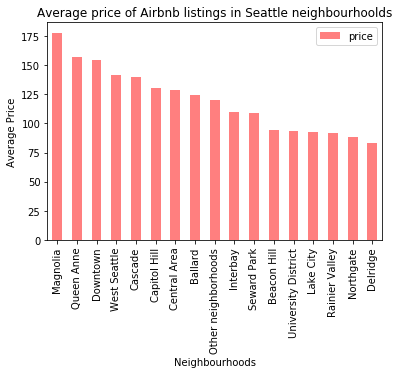

In [59]:
# What is the average price accross neighbourhoods?

def plot_distribution_average(data, variable, average_variable, title, xlabel, ylabel):
    
    '''
    INPUT
    data - pandas dataframe 
    variable - variable to split on
    average_variable - variable to average
    tite - the graph title
    xlabel - the graph x axis label
    ylabel - the graph y axis label
    
    OUTPUT
    graph
    
    This function generates a graph that shows the average of the 'average_variable' for all the listings per 'variable'.
    '''
    
    averages = pd.DataFrame(data.groupby([variable]).mean()[average_variable])
    averages_sorted = averages.sort_values(average_variable, ascending=False)
    averages_sorted.plot(kind="bar",color=(1, 0, 0, 0.5));
    plt.title(title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plot_distribution_average(listings_clean, 'neighbourhood_group_cleansed','price' 
                         ,"Average price of Airbnb listings in Seattle neighbourhoolds",'Neighbourhoods', 'Average Price')

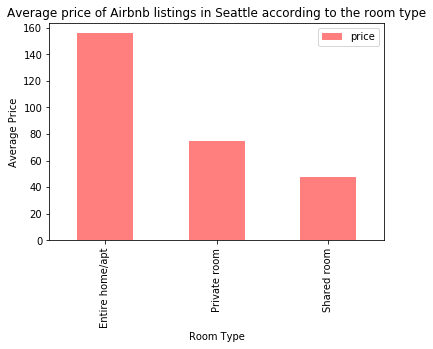

In [60]:
# What is the average price accross room types?

plot_distribution_average(listings_clean, 'room_type','price' 
                         ,"Average price of Airbnb listings in Seattle according to the room type"
                         ,'Room Type', 'Average Price')

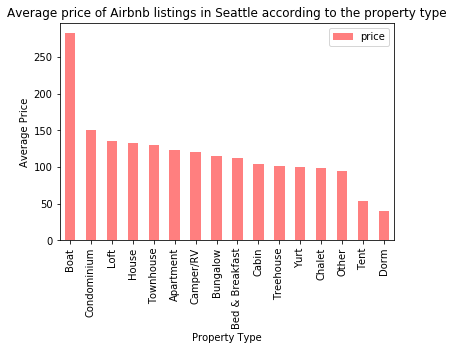

In [61]:
# What is the average price accross property types?

plot_distribution_average(listings_clean, 'property_type','price' 
                         ,"Average price of Airbnb listings in Seattle according to the property type"
                         ,'Property Type', 'Average Price')

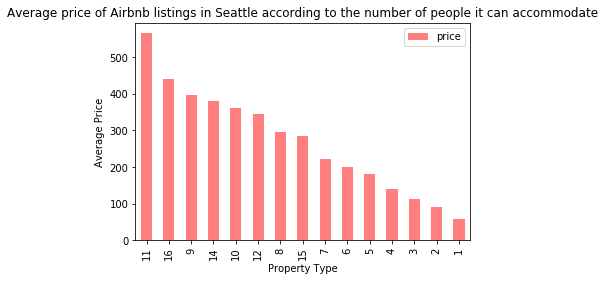

In [62]:
# What is the average price depending the number of people it can accomodate?

plot_distribution_average(listings_clean, 'accommodates', 'price' 
                         ,"Average price of Airbnb listings in Seattle according to the number of people it can accommodate"
                         ,'Property Type', 'Average Price')

**Let's now drop the categorical variables that can't be used to model the data**

In [207]:
listings_q1 = listings_clean.drop(listings_clean.select_dtypes(include=['object']).columns, axis=1)

**Let's modify some columns if we need to**

*Extra people*

The amount to pay for extra guests will be considered as high or low depending on the initial price of the listing. Therefore, we will modify the column to express it as a proportion of the price.

In [208]:
listings_q1['extra_people'] = listings_q1['extra_people']/listings_q1['price']

*Security deposit and cleaning fee*

I will first look at security deposit and cleaning fee. After screening multiple houses on airbnb website, I dicovered that there aren't always security deposits and cleaning fees asked for a listing. I will assume then when the value is null for this column it means that there is no security deposit or cleaning fee.

However, it is difficult to work with these as a number because they are fixed, independently of the length of the stay. For example, if the cleaning fee is 20 dollars, a person who only stays one day will pay 20 dollars per day for the cleaning fees. However, if a person stays 5 days, the person will pay 4 dollars per day for the fee.

To handle this complexity, I will create new fields for security deposit and cleaning fees that will only indicate if there is one.

In [209]:
fields_to_modify = ['security_deposit','cleaning_fee']

for field in fields_to_modify:
    listings_q1[field] = np.where(listings_q1[field] > 0, 1, 0)

**Let's look at the remaining columns with missing values and decide whether I want to**
1. keep them in the analysis or not
2. fill them with 0
3. fill them with the mean
4. fill them with another number
5. create a new field based on the column with missing values

In [210]:
missing_values(listings_q1)

,field,percentage_nulls
1,host_acceptance_rate,20.246202
27,review_scores_checkin,17.234154
25,review_scores_accuracy,17.234154
30,review_scores_value,17.181771
29,review_scores_location,17.155579
26,review_scores_cleanliness,17.103195
28,review_scores_communication,17.050812
24,review_scores_rating,16.946045
35,reviews_per_month,16.422211
0,host_response_rate,13.698271


*Host acceptance rate and host reponse rate*

The host acceptance rate and host response rate may not be provided in certain cases. We will first check if those values are correlated with other ones to be able to fill them.

In [211]:
def correlation_feature(data, feature):
    
    '''
    INPUT
    data - pandas dataframe 
    feature - feature to check correlation against
    
    OUTPUT
    corr_df - dataframe with the columns and their correlation against the feature chosen
    
    This function generates a dataframe with the columns and their correlation against the feature chosen.
    '''
    
    corr_df = pd.DataFrame(data.corr()[feature]).abs().sort_values(feature, ascending=False)
    return corr_df
    
correlation_feature(listings_q1,'host_acceptance_rate').head(10)

,host_acceptance_rate
host_acceptance_rate,1.000000
bed_type_Pull-out Sofa,0.155144
room_type_Shared room,0.095439
bed_type_Real Bed,0.089876
smoke detector,0.046079
neighbourhood_group_cleansed_Capitol Hill,0.043869
buzzer/wireless intercom,0.043696
host_response_time_within a day,0.041388
instant_bookable,0.039126
host_identity_verified,0.038433


In [212]:
correlation_feature(listings_q1,'host_response_rate').head(10)

,host_response_rate
host_response_rate,1.000000
host_response_time_a few days or more,0.547109
host_response_time_within a day,0.342500
host_response_time_within an hour,0.330678
reviews_per_month,0.171140
review_scores_cleanliness,0.170897
review_scores_rating,0.156567
review_scores_communication,0.155346
host_is_superhost,0.153810
review_scores_value,0.149482


There isn't an strong correlation between host acceptance rate/host response rate and another column. Given that the data is missing in 20% and 13% of the cases respectively, we prefer to drop those two columns.

In [213]:
listings_q1 = listings_q1.drop(['host_acceptance_rate','host_response_rate'], axis = 1)

*Review scores*

For this exercise, we will only focus on the main review score. Therefore, we will drop all the other components of the review score rating.

In [214]:
review_columns_to_drop = ['review_scores_accuracy','review_scores_checkin','review_scores_value','review_scores_location'
                          ,'review_scores_cleanliness','review_scores_communication']

listings_q1 = listings_q1.drop(review_columns_to_drop,axis=1)

Moreover, 16% of the listings do not have any reviews, and therefore do not have any rating. Let's see if the rating is strongly correlated to another variable. Otherwise, we will fill the values with the column mean.

In [215]:
correlation_feature(listings_q1,'review_scores_rating').head(10)

,review_scores_rating
review_scores_rating,1.000000
host_is_superhost,0.240895
calculated_host_listings_count,0.219280
neighbourhood_group_cleansed_University District,0.163227
shampoo,0.131519
fire extinguisher,0.117084
first aid kit,0.114217
host_total_listings_count,0.109357
host_listings_count,0.109357
safety card,0.105639


In [216]:
listings_q1['review_scores_rating'] = listings_q1['review_scores_rating'].fillna(listings_q1['review_scores_rating'].mean())

*Reviews per month*

We have observed that the missing values of the reviews per month happen when there haven't been any review yet for the listing. Therefore, we will fill the missing values with zeros.

In [217]:
listings_q1['reviews_per_month'] = listings_q1['reviews_per_month'].fillna(0)

*Others*

We will fillt the other values with the mean. These are either the host_response_rate or values with less than 1% of missing values.

In [218]:
# Columns with still missing values
missing_values_cols = list(listings_q1.columns[listings_q1.isnull().mean() > 0])

# Fill with the mean
for col in missing_values_cols:
    listings_q1[col] = listings_q1[col].fillna(listings_q1[col].mean())

In [219]:
listings_q1.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,days_since_host,,heating,washer,pool,doorman,24-hour check-in,lock on bedroom door,fire extinguisher,carbon monoxide detector,family/kid friendly,first aid kit,kitchen,free parking on premises,air conditioning,buzzer/wireless intercom,wheelchair accessible,pets allowed,dryer,hot tub,dog(s),breakfast,other pet(s),pets live on this property,wireless internet,cable tv,tv,smoke detector,hair dryer,shampoo,laptop friendly workspace,elevator in building,safety card,essentials,iron,indoor fireplace,suitable for events,internet,hangers,gym,smoking allowed,cat(s)
0,0.0,3.0,3.0,1.0,1.0,1,4,1.0,1.0,1.0,85.0,0,0,2,0.058824,1,365,14,41,71,346,207,95.000000,0,0,0,2,4.07,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2898.0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,6.0,6.0,1.0,1.0,1,4,1.0,1.0,1.0,150.0,1,1,1,0.000000,2,90,13,13,16,291,43,96.000000,0,1,1,6,1.48,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2338.0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,0.0,2.0,2.0,1.0,1.0,1,11,4.5,5.0,7.0,975.0,1,1,10,0.025641,4,30,1,6,17,220,20,97.000000,0,0,0,2,1.15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1862.0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
3,0.0,1.0,1.0,1.0,1.0,1,3,1.0,0.0,2.0,100.0,0,0,1,0.000000,1,1125,0,0,0,143,0,94.539262,0,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,2080.0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
4,0.0,2.0,2.0,1.0,1.0,1,6,2.0,3.0,3.0,450.0,1,1,6,0.033333,1,1125,30,60,90,365,38,92.000000,0,0,0,1,0.89,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2788.0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0


**Let's look at the correlation between the features and the price**

Let's look at the top 25 correlated features. That will help us determine which features we should keep into our model.

In [220]:
correlation_feature(listings_q1,'price').head(25)

,price
price,1.000000
accommodates,0.652218
bedrooms,0.627596
beds,0.589306
bathrooms,0.516017
room_type_Entire home/apt,0.435622
guests_included,0.392875
room_type_Private room,0.387502
family/kid friendly,0.259901
cable tv,0.237309


Obvisouly, there are too many features in the data. We need to reduce the number of features to improve our model's accuracy. To do so, we will remove all the features that have less than 13% correlation (in absolute value) with the price (see in the next function).

**Let's run a linear regression on our data to see what influences the price the most**

In [221]:
def get_linear_regression_score(data, independent_var, test_size, random_state, percentage_correlation):
    
    '''
    INPUT
    data - pandas dataframe 
    independent_var - the independent variable to predict
    test_size - the percentage of data in the test (in decimal)
    random_state - the random state to keep the same results
    percentage_correlation - keep the features in the model that had least this percentage of correlation with the
                             independent value (in decimal)
    
    OUTPUT
    test_score - the regression test R2 score
    train_score - the regression train R2 score
    coefs_df - a dataframe with the regression coefficients
    
    This function runs a linear regression and provides the R2 and regression coefficients. It is using the 
    following steps:
    1. Remove the features from the dataframe that have less than percentage_correlation % correlation with the 
       independent variable.
    2. Set the independent variable aside
    3. Split the dataset into training and test datasets
    4. Instantiate and fit the linear regression model
    5. Generate predictions using the model
    6. Score the model
    7. Generate a dataframe with the linear regression coefficients
    '''
    
    # Remove features with less than x% correlation
    correlation = correlation_feature(data,independent_var).reset_index()
    correlation.columns = ['column', 'correlation']
    correlation_less_than_x = list(correlation[correlation['correlation'] <= percentage_correlation]['column'])
    data = data.drop(correlation_less_than_x, axis = 1)
    
    # Get X and y
    X = data.drop(independent_var,axis=1)
    y = data[independent_var]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state) 
    
    # Normalize the data
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train))
    X_test = pd.DataFrame(sc.transform(X_test))

    # Instantiate and fit the model
    lm_model = LinearRegression() # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    # Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    # Get the regression coefficients
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    
    return test_score, train_score, coefs_df

In [224]:
q1_test_score, q1_train_score, coefs_df_q1 = get_linear_regression_score(listings_q1, 'price', 0.30, 42, 0.13)
q1_test_score

0.55624929174147031

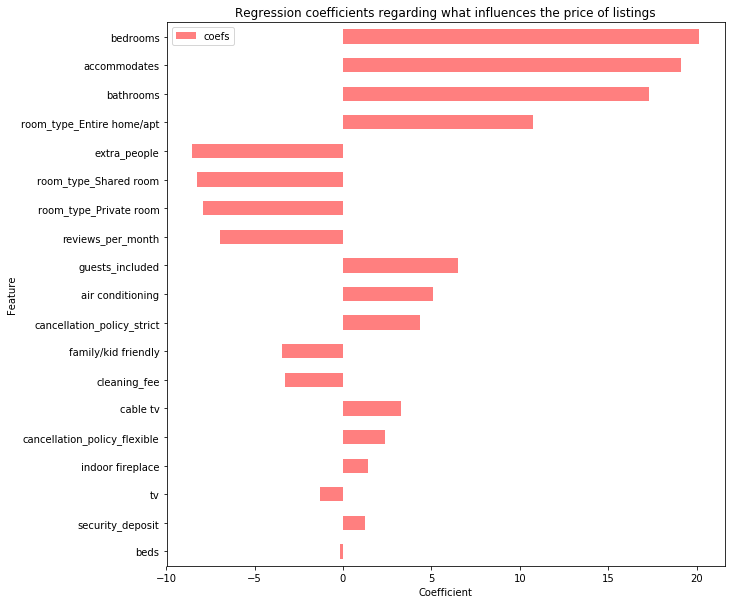

In [225]:
def plot_coefs(coefs, size, title, xlabel, ylabel):
    coef_df = coefs.sort_values('abs_coefs', ascending=True).drop('abs_coefs',axis=1)
    coef_df.set_index('est_int').plot(kind='barh',figsize=size, color=(1, 0, 0, 0.5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plot_coefs(coefs_df_q1, (10, 10), "Regression coefficients regarding what influences the price of listings"
           , 'Coefficient', 'Feature')

**Let's try with a decision trees regression to see if we are getting better results**

In [80]:
def get_trees_regression_score(model, data, independent_var, test_size, random_state, percentage_correlation):
    
    '''
    INPUT
    model - the model to use
    data - pandas dataframe 
    independent_var - the independent variable to predict
    test_size - the percentage of data in the test (in decimal)
    random_state - the random state to keep the same results
    percentage_correlation - keep the features in the model that had least this percentage of correlation with the
                             independent value (in decimal)
    
    OUTPUT
    test_score - the regression test R2 score
    train_score - the regression train R2 score
    coefs_df - a dataframe with the regression coefficients
    
    This function runs a linear regression and provides the R2 and regression coefficients. It is using the 
    following steps:
    1. Remove the features from the dataframe that have less than percentage_correlation % correlation with the 
       independent variable.
    2. Set the independent variable aside
    3. Split the dataset into training and test datasets
    4. Instantiate and fit the linear regression model
    5. Generate predictions using the model
    6. Score the model
    7. Generate a dataframe with the linear regression coefficients
    '''
    
    # Remove features with less than x% correlation
    correlation = correlation_feature(data,independent_var).reset_index()
    correlation.columns = ['column', 'correlation']
    correlation_less_than_x = list(correlation[correlation['correlation'] <= percentage_correlation]['column'])
    data = data.drop(correlation_less_than_x, axis = 1)
    
    # Get X and y
    X = data.drop(independent_var,axis=1)
    y = data[independent_var]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state) 
    
    # Normalize the data
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train))
    X_test = pd.DataFrame(sc.transform(X_test))

    # Instantiate and fit the model
    dt_r_model = model # Instantiate
    dt_r_model.fit(X_train, y_train) #Fit

    # Predict using your model
    y_test_preds = dt_r_model.predict(X_test)
    y_train_preds = dt_r_model.predict(X_train)

    # Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return test_score, train_score

In [81]:
q1_test_score_dt, q1_train_score_dt = get_trees_regression_score(DecisionTreeRegressor(), listings_q1, 'price', 0.30, 42, 0.01)
q1_test_score_dt

0.20946254708267675

The linear regression was providing a higher R2.

**Let's try again with a random forest regressor**

In [82]:
q1_test_score_dt, q1_train_score_dt = get_trees_regression_score(RandomForestRegressor(), listings_q1, 'price', 0.30, 42, 0.01)
q1_test_score_dt

0.59675972356570028

This gives a R2 around the same as the linear model. We will stick to the linear model given that it provides better interpretability.

We will then result with a model that expains 56% of the changes in the price. The cause of the level of R2 might be due to the fact that the assumptions behind the linear regression aren't totally met (e.g., multivariate normality or no/little multicollinearity). We will not do further research as part of this projecct.

### 4.3. Question 2: Which amenities contributes the most to increase a listing rating?

**Let's keep only the main rating and amenities fields**

In [83]:
ratings_amenities = pd.concat([listings_clean['review_scores_rating'], amenity_df.drop("",axis=1)], axis=1)

**Let's handle the remaining missing values**

In [84]:
# Which columns have missing values and in which proportion
missing_values(ratings_amenities)

,field,count_nulls
0,review_scores_rating,16.946045


In [85]:
# Remove rows without a rating, given that it is the independent variable we want to look at
ratings_amenities = ratings_amenities.dropna(subset=['review_scores_rating'], how='any')

In [86]:
ratings_amenities.head()

,review_scores_rating,heating,washer,pool,doorman,24-hour check-in,lock on bedroom door,fire extinguisher,carbon monoxide detector,family/kid friendly,first aid kit,kitchen,free parking on premises,air conditioning,buzzer/wireless intercom,wheelchair accessible,pets allowed,dryer,hot tub,dog(s),breakfast,other pet(s),pets live on this property,wireless internet,cable tv,tv,smoke detector,hair dryer,shampoo,laptop friendly workspace,elevator in building,safety card,essentials,iron,indoor fireplace,suitable for events,internet,hangers,gym,smoking allowed,cat(s)
0,95.0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,96.0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,97.0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
4,92.0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
5,95.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


**Let's do some exploratory analysis on the data**

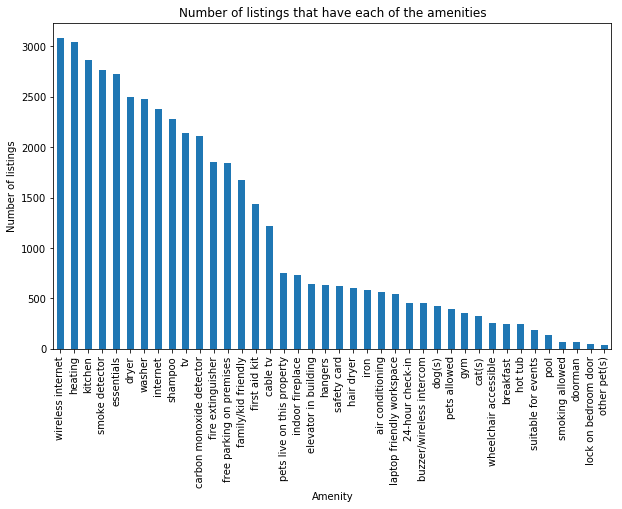

In [87]:
# What is the proportion of listings that have each amenity?
ratings_amenities.drop('review_scores_rating', axis=1).sum(axis = 0, skipna = False).sort_values(ascending = False).plot(kind="bar",figsize=(10, 6))
plt.title('Number of listings that have each of the amenities')
plt.xlabel('Amenity')
plt.ylabel('Number of listings')

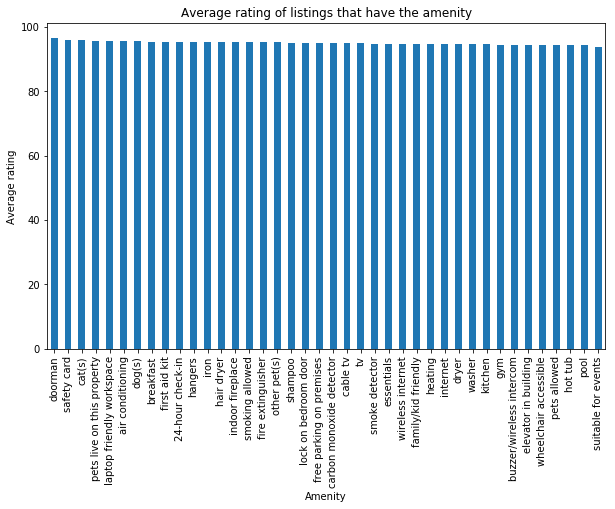

In [88]:
# What is the average rating per listing that has the amenity?
mean_list = []

for amenity in list(ratings_amenities.drop('review_scores_rating',axis=1).columns):
    mean = ratings_amenities['review_scores_rating'][ratings_amenities[amenity] == 1].mean()
    mean_list.append(mean)
    
amenity_ranking_mean = pd.Series(mean_list, index=list(ratings_amenities.drop('review_scores_rating',axis=1).columns))
amenity_ranking_mean.sort_values(ascending = False).plot(kind="bar",figsize=(10, 6))
plt.title('Average rating of listings that have the amenity')
plt.xlabel('Amenity')
plt.ylabel('Average rating')

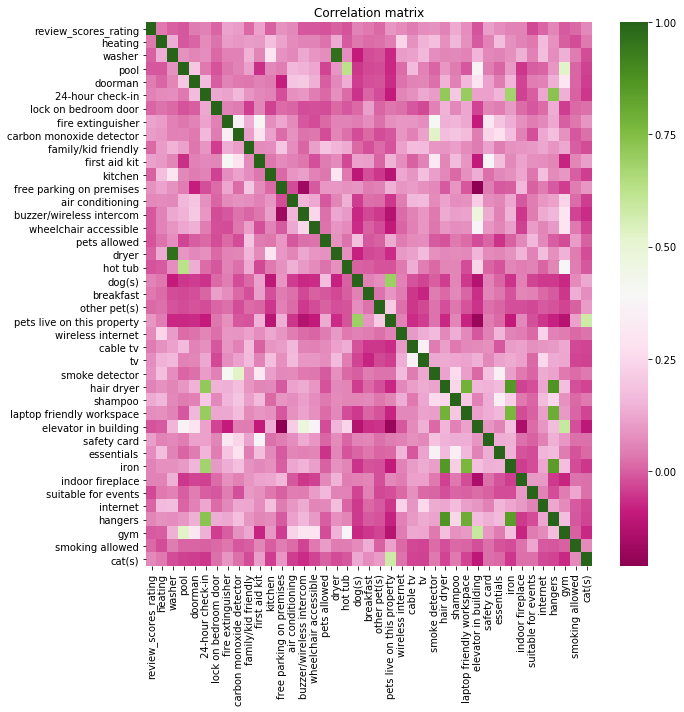

In [89]:
# Let's look at the correlation matrix between all the values
def corr_matrix(data, size):
    
    '''
    INPUT
    data - pandas dataframe 
    size - the graph size
    
    OUTPUT
    graph - correlation matrix
    
    This function generates a graph with contains a correation matrix of the features in data.
    '''
    
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(data.corr(), ax = ax, cmap = 'PiYG')
    plt.title('Correlation matrix')
    
corr_matrix(ratings_amenities, (10,10))

In [90]:
# Let's look at the top 10 variables the most correlated with the ratings
correlation_feature(ratings_amenities,'review_scores_rating').head(10)

,review_scores_rating
review_scores_rating,1.000000
shampoo,0.131519
fire extinguisher,0.117084
first aid kit,0.114217
safety card,0.105639
carbon monoxide detector,0.101819
pets live on this property,0.092559
free parking on premises,0.085832
smoke detector,0.083738
tv,0.075520


**Let's run a linear regression to find out what influences the rating the most**

In [91]:
q2_test_score, q2_train_score, coefs_df_q2 = get_linear_regression_score(ratings_amenities
                                                                         , 'review_scores_rating', 0.30, 42, 0.05)
q2_test_score

0.025197724803958432

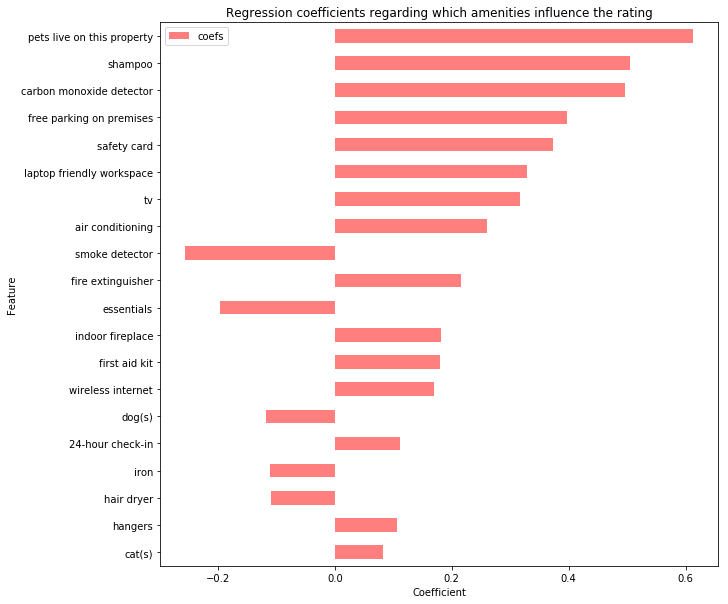

In [92]:
plot_coefs(coefs_df_q2, (10, 10), "Regression coefficients regarding which amenities influence the rating"
           , 'Coefficient', 'Feature')

We can see that the model explains only 2.5% of the rating. Therefore, we can conclude that there isn't an amenity which has an influence on the rating.

**Let's try with a decision trees regression**

In [93]:
q2_test_score_dt, q2_train_score_dt = get_trees_regression_score(DecisionTreeRegressor(), ratings_amenities
                                                                 , 'review_scores_rating', 0.30, 42, 0.05)
q2_test_score_dt

-0.47761074634664147

Given that we are getting a negative R2, our model does not explain the relationship better than a line.

**Let's try with a random forest regressor**

In [94]:
q1_test_score_dt, q1_train_score_dt = get_trees_regression_score(RandomForestRegressor(), ratings_amenities
                                                                     , 'review_scores_rating', 0.30, 42, 0.05)
q1_test_score_dt

-0.11299737807221644

Same conclusion as with the decision trees regression.

**Let's focus on one component of the rating**

The rating is made of of multiple components:
1. Cleanliness: Did your guests feel that your space was clean and tidy?
2. Accuracy: How accurately did your listing page represent your space?
3. Value: Did your guest feel your listing provided good value for the price?
4. Communication: How well did you communicate with your guest before and during their stay?
5. Arrival: How smoothly did their check-in go?
6. Location: How did guests feel about your neighborhood?

(source: https://www.airbnb.com/help/article/1257/how-do-star-ratings-work)

Only one component of the rating might actually have an impact based on the amenities: value. Indeed, the fact that the place was clean and tidy is not really related to the amenities it contains. Therefore, we will repeat the model for the value part of the rating only, and see if we can have a model that explains this variable.

In [95]:
# Get the dataset
value_ratings_amenities = pd.concat([listings_clean['review_scores_value'], amenity_df.drop("",axis=1)], axis=1)

# Remove rows with no value rating
value_ratings_amenities = value_ratings_amenities.dropna(subset=['review_scores_value'], how='any')

# Let's look at the top 10 variables the most correlated with the ratings
correlation_feature(value_ratings_amenities,'review_scores_value').head(10)

,review_scores_value
review_scores_value,1.000000
pets live on this property,0.105870
free parking on premises,0.104606
first aid kit,0.101641
shampoo,0.093584
fire extinguisher,0.088228
carbon monoxide detector,0.086326
cat(s),0.081938
elevator in building,0.070036
breakfast,0.065616


In [96]:
# Let's run the linear regression
q2_test_score_v, q2_train_score_v, coefs_df_q2_v = get_linear_regression_score(value_ratings_amenities
                                                                         , 'review_scores_value', 0.30, 42, 0.05)
q2_test_score_v

0.023634177046622074

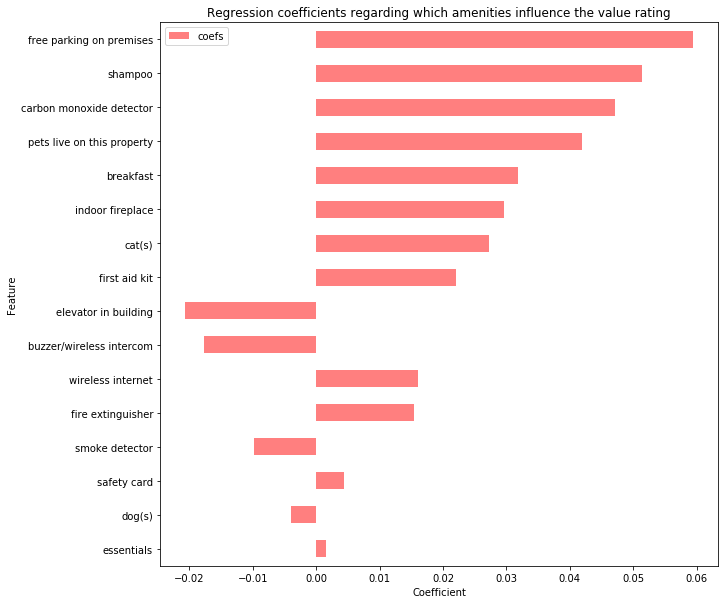

In [97]:
# Let's visualize the linear regression coefficients
plot_coefs(coefs_df_q2_v, (10, 10), "Regression coefficients regarding which amenities influence the value rating"
           , 'Coefficient', 'Feature')

In [98]:
# Let's try the decision tree regressor
q2_test_score_dt_v, q2_train_score_dt_v = get_trees_regression_score(DecisionTreeRegressor(), value_ratings_amenities
                                                                 , 'review_scores_value', 0.30, 42, 0.05)
q2_test_score_dt_v

-0.20544834910721832

In [99]:
# Let's try the random forest regressor
q1_test_score_dt_v, q1_train_score_dt_v = get_trees_regression_score(RandomForestRegressor(), value_ratings_amenities
                                                                     , 'review_scores_value', 0.30, 42, 0.05)
q1_test_score_dt

-0.11299737807221644

We were not able to get a better model looking at the value review rating alone. Therefore, we cannot recommend an amenity to improve the rating score.

### 4.4. Question 3: When is the busiest period in Seattle, based on houses availability? Are the prices following the trend?

For this question, we will look at the calendar data instead of the listings data.

In [100]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Clean the data**

In [101]:
def clean_calendar_data(data, date_column, price_column, columns_no_need):
    
    '''
    INPUT
    data - pandas dataframe 
    date_column - column that contains the data
    price_column - column that contains the price with a dollar sign
    columns_no_need - columns not needed in the output
    
    OUTPUT
    data_clean - cleaned dataframe
    
    This function cleans the calendar dataset using the following steps:
    1. Convert the date-related fields to a date format
    2. Remove dollar sign from price-related fields
    3. Keep the listings available on each date only
    4. Remove the fields specified in columns_no_need
    '''
      
    # Convert dates columns from object to date
    data['date_available'] = pd.to_datetime(data[date_column])
    
    # Remove $ from price (price always filled except when non available)
    data[price_column] = data[price_column].fillna('$0').str.slice(start=1).str.replace(",","").astype(float)
    
    # Keep available dates only
    data = data[data['available'] == 't']  
    
    # Drop columns with do not need
    data_clean = data.drop(columns_no_need, axis=1)
    
    return data_clean

In [102]:
calendar_clean = clean_calendar_data(calendar, 'date', 'price', ['listing_id', 'available', 'date'])
calendar_clean.head()

,price,date_available
0,85.0,2016-01-04
1,85.0,2016-01-05
9,85.0,2016-01-13
10,85.0,2016-01-14
14,85.0,2016-01-18


**Plot the data**

Let's look at the distribution of the available listings and their average prices.

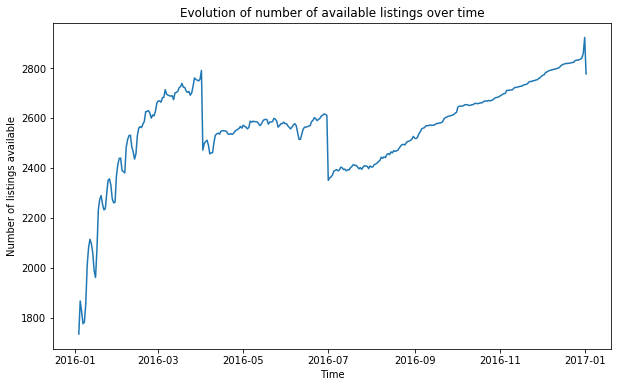

In [103]:
## Look at the availability distribution

def plot_nb_listings(data, xaxis, yaxis, title, xlabel, ylabel):
    
    '''
    INPUT
    data - pandas dataframe 
    xaxis - the name of the field to use as x axis
    yaxis - the name of the field to use as y axis
    title - the graph title
    xlabel - the graph x label
    ylabel - the graph y label
    
    OUTPUT
    graph - graph showing the number of listings available over time
    
    This function generates a graph that shows the number of listings available over time.
    '''
    
    listings_per_day = data.groupby(xaxis).count().reset_index()
    listings_per_day.columns = [xaxis,yaxis]
    x_listings = listings_per_day[xaxis]
    y_listings = listings_per_day[yaxis]
    plt.figure(figsize=(10,6))
    plt.plot(x_listings,y_listings)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plot_nb_listings(calendar_clean, 'date_available', 'nb_listings', 'Evolution of number of available listings over time'
                 , 'Time', 'Number of listings available')

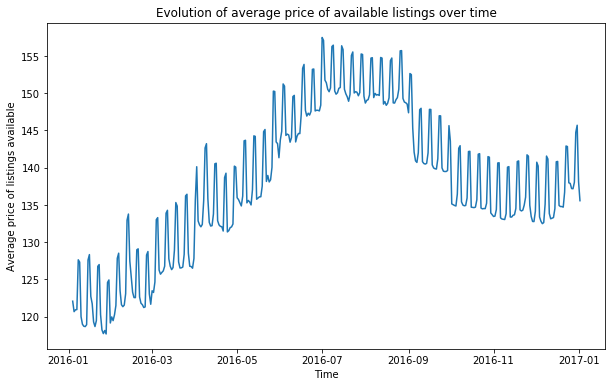

In [104]:
## Look at the average price

def plot_avg_price(data, xaxis, yaxis, title, xlabel, ylabel):
    
    '''
    INPUT
    data - pandas dataframe 
    xaxis - the name of the field to use as x axis
    yaxis - the name of the field to use as y axis and to calculate the average of
    title - the graph title
    xlabel - the graph x label
    ylabel - the graph y label
    
    OUTPUT
    graph - graph showing the number of listings available over time
    
    This function generates a graph that shows the average of the yaxis over time.
    '''

    listings_avg_price_per_day = data.groupby(xaxis).mean()[yaxis].reset_index()
    listings_avg_price_per_day.columns = [xaxis,yaxis]
    x_price = listings_avg_price_per_day[xaxis]
    y_price = listings_avg_price_per_day[yaxis]
    plt.figure(figsize=(10,6))
    plt.plot(x_price,y_price)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plot_avg_price(calendar_clean, 'date_available', 'price', 'Evolution of average price of available listings over time'
                 , 'Time', 'Average price of listings available')

We can make a few quick observations from this graph:
1. We can see two drastic drops in the number of listings available in April and July. The both corresponds to peaks in the average price of the listings. Moreover, after July's peak in average prices, the price have never been as high ever since during the year.
2. While the number of listings available kept on steadily increasing as of July, the average prices trend have been going down, with a slight increase towards the end of the year, corresponding to the end of the year celebrations.
3. It looks like there is a strong seasonality pattern in the average prices evolution over time.

Let's look at three periods in particular, to understand the data more in details
1. May 2016
2. September 2016
3. December 2016
We have deliberately chosen not to look before May given that the number of listings available varies a lot during that period.

In [105]:
# May 2016
calendar_may_16 = calendar_clean[calendar_clean['date_available'] >= '2016-05-01'][calendar_clean['date_available'] < '2016-06-01']

C:\Users\jtrinco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


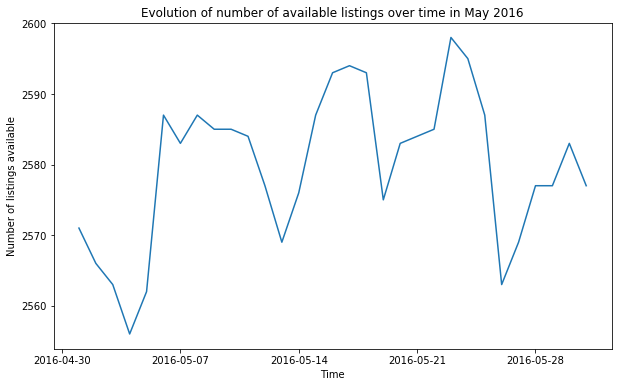

In [106]:
plot_nb_listings(calendar_may_16, 'date_available', 'nb_listings'
                 , 'Evolution of number of available listings over time in May 2016'
                 , 'Time', 'Number of listings available')

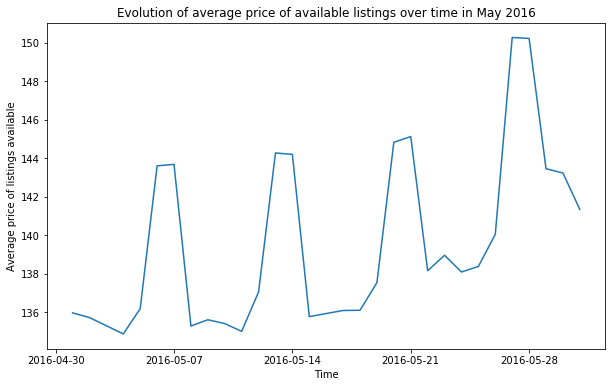

In [107]:
plot_avg_price(calendar_may_16, 'date_available', 'price'
                 , 'Evolution of average price of available listings over time in May 2016'
                 , 'Time', 'Average price of listings available')

In [108]:
# September 2016
calendar_sept_16 = calendar_clean[calendar_clean['date_available'] >= '2016-09-01'][calendar_clean['date_available'] < '2016-10-01']

C:\Users\jtrinco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


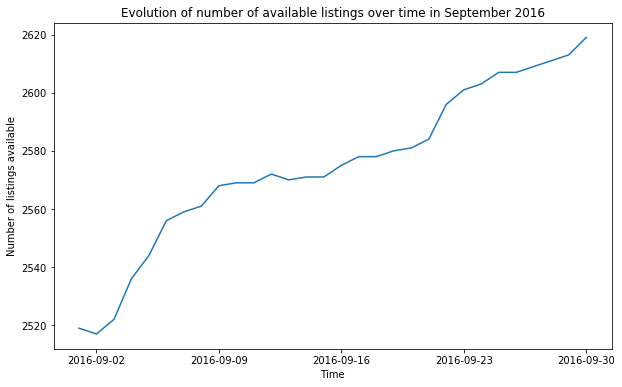

In [109]:
plot_nb_listings(calendar_sept_16, 'date_available', 'nb_listings'
                 , 'Evolution of number of available listings over time in September 2016'
                 , 'Time', 'Number of listings available')

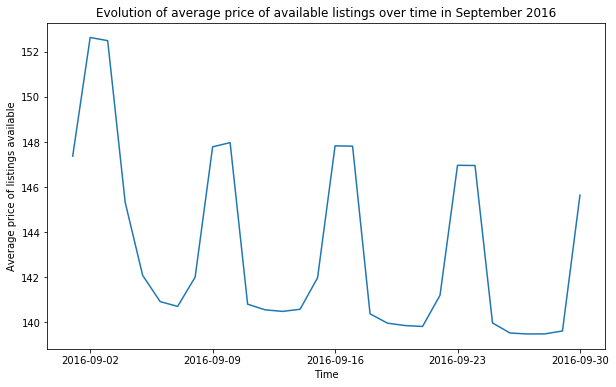

In [110]:
plot_avg_price(calendar_sept_16, 'date_available', 'price'
                 , 'Evolution of average price of available listings over time in September 2016'
                 , 'Time', 'Average price of listings available')

In [111]:
# December 2016
calendar_dec_16 = calendar_clean[calendar_clean['date_available'] >= '2016-12-01'][calendar_clean['date_available'] < '2017-01-01']

C:\Users\jtrinco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


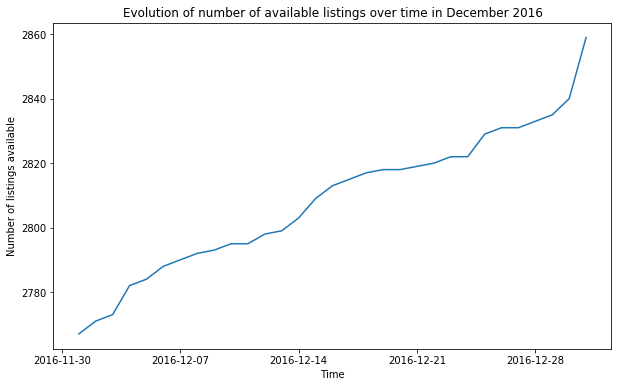

In [112]:
plot_nb_listings(calendar_dec_16, 'date_available', 'nb_listings'
                 , 'Evolution of number of available listings over time in December 2016'
                 , 'Time', 'Number of listings available')

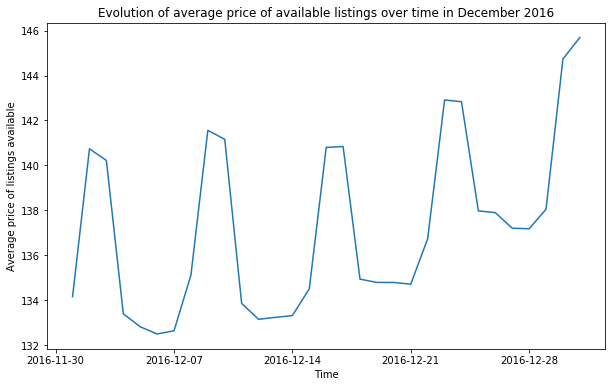

In [113]:
plot_avg_price(calendar_dec_16, 'date_available', 'price'
                 , 'Evolution of average price of available listings over time in December 2016'
                 , 'Time', 'Average price of listings available')

Here are a few quick observations we can derive from these three periods:
1. We can see that the average prices are systematically higher on Fridays and Saturdays.
2. In September and December, the number of listings available do not change on weekends. However, the number of listings available towards the end of December is increasing. This makes us think of people going to their families during the holidays and puttin their place for rent on Airbnb.
